## Dimensionality Reduction

**Dimensionality Reduction is used for a well known problem called as 'Curse Of Dimensionality'.**
**The Wikipedia defines of Curse of Dimensionality as follows : The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. **

** To overcome the above problem, we do dimensionality reduction. SO how to perform Dimensionality Reduction, there are number of ways of Dimensionality reduction such as feature selection and Feature Extraction.**

** We will be looking at Feature Extraction methods of Dimensionality Reduction **

** Two we'll known dimension reduction technique are PCA and Truncated SVD **

   **PCA** : Principal Components Analysis means components which are able to explain the maximum amount of variance of the features with respect to target variable, if we include all feature as components then we get the variance of 1.
     
   **TruncatedSVD**: It is very similar to PCA, the only difference one can specify technically is PCA performs variance calculation on Covariance matrix but TSVD does the same on sample direct vectors.
     
   **Our ultimate aim here is to explain the maximum variance of the feature using as less components as possible.**
     
**Please find the below link for better understanding of PCA vs Truncated SVD:**
     
**"https://stats.stackexchange.com/questions/239481/difference-between-scikit-learn-implementations-of-pca-and-truncatedsvd"**

In [36]:
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import skimage as img
import seaborn as sns

In [37]:
load_digits = load_digits()

**We are loading the digits dataset for our problem. We can notice that we have around 64 feature representing the digit.**

In [38]:
load_digits.data.shape

(1797, 64)

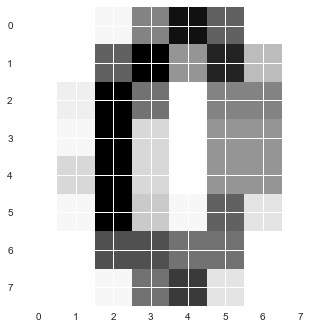

In [39]:
plt.imshow(np.array(load_digits.data[10]).reshape(8,8))
plt.show()

In [40]:
X = load_digits.data
y = load_digits.target

** Variance of an feature with respect to target variable, explains a lot about the relationship between feature and target variable **

** We have a list of components included in our list over which we try to explain the variance. As the components are increases the variance increases. What is right number of components ? **

In [41]:
for x in list([4,8,12,16,20,24,28,32,63]):
    dimReduction = TruncatedSVD(n_components=x)
    X_DR = dimReduction.fit_transform(X)
    print("Explained Variance with ", x ," Components: " ,dimReduction.explained_variance_ratio_.sum())
    X_train,X_test,y_train,y_test = train_test_split(X_DR,y,test_size=0.25)
    RFC = RandomForestClassifier()
    mnb = GaussianNB()
    RFC.fit(X_train,y_train)
    mnb.fit(X_train,y_train)
    y_pred = RFC.predict(X_test)
    y_prediction = mnb.predict(X_test)
    print("Accuracy Score with Random Forest Classifier",m.accuracy_score(y_test,y_pred))
    print("Accuracy Score with Gaussian NB ",m.accuracy_score(y_test,y_prediction))
    print("--------------------------------------------------")

Explained Variance with  4  Components:  0.431379300562
Accuracy Score with Random Forest Classifier 0.788888888889
Accuracy Score with Gaussian NB  0.708888888889
--------------------------------------------------
Explained Variance with  8  Components:  0.662835691107
Accuracy Score with Random Forest Classifier 0.931111111111
Accuracy Score with Gaussian NB  0.866666666667
--------------------------------------------------
Explained Variance with  12  Components:  0.779908849429
Accuracy Score with Random Forest Classifier 0.948888888889
Accuracy Score with Gaussian NB  0.942222222222
--------------------------------------------------
Explained Variance with  16  Components:  0.847958128738
Accuracy Score with Random Forest Classifier 0.962222222222
Accuracy Score with Gaussian NB  0.946666666667
--------------------------------------------------
Explained Variance with  20  Components:  0.894062078056
Accuracy Score with Random Forest Classifier 0.951111111111
Accuracy Score with G

In [42]:
for x in list([4,8,12,16,20,24,28,32,63]):
    dimReduction = PCA(n_components=x)
    X_DR_PCA = dimReduction.fit_transform(X)
    print("Explained Variance with", x ," Components: " ,dimReduction.explained_variance_ratio_.sum())
    X_train,X_test,y_train,y_test = train_test_split(X_DR_PCA,y,test_size=0.25)
    RFC_2 = RandomForestClassifier()
    RFC_2.fit(X_train,y_train)
    mnb.fit(X_train,y_train)
    y_pred = RFC_2.predict(X_test)
    y_prediction = mnb.predict(X_test)
    print("Accuracy Score with Random Forest Classifier",m.accuracy_score(y_test,y_pred))
    print("Accuracy Score with Gaussian NB",m.accuracy_score(y_test,y_prediction))
    print("--------------------------------------------------")

Explained Variance with 4  Components:  0.487139380086
Accuracy Score with Random Forest Classifier 0.817777777778
Accuracy Score with Gaussian NB 0.755555555556
--------------------------------------------------
Explained Variance with 8  Components:  0.673904519232
Accuracy Score with Random Forest Classifier 0.926666666667
Accuracy Score with Gaussian NB 0.882222222222
--------------------------------------------------
Explained Variance with 12  Components:  0.784673995424
Accuracy Score with Random Forest Classifier 0.922222222222
Accuracy Score with Gaussian NB 0.902222222222
--------------------------------------------------
Explained Variance with 16  Components:  0.849398516022
Accuracy Score with Random Forest Classifier 0.94
Accuracy Score with Gaussian NB 0.917777777778
--------------------------------------------------
Explained Variance with 20  Components:  0.894295070641
Accuracy Score with Random Forest Classifier 0.942222222222
Accuracy Score with Gaussian NB 0.924444

** From 64 Feature vector to 24 Feature, to get the same result :**
We can see from the changes in variance with respect to the components, the changes saturate after n_components is 24 which can seen from the result mentioned below !

In [43]:
pca_1_Comp = PCA(n_components=24)
X_1 = pca_1_Comp.fit_transform(X)

In [44]:
pca_1_Comp.explained_variance_ratio_.sum()

0.9260694418377089

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_1,y,test_size = 0.2,random_state=1)

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
print(m.accuracy_score(y_test,y_predict))

0.936111111111
